# Minor EDA on a couple of playlists
I would like to do specific EDA on four genres (country, alternative, pop, and rap) and then general EDA on my big, final dataset that combines all of the playlists that I pulled data from, including club, EDM, and general 'hits' playlists. Possible things to look at for each playlist: most pop song attributes, least pop song attributes, mean attributes of all songs (especially look at features that the genre is 'known' for).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Hot Country Playlist - 54 songs

In [3]:
country = pd.read_csv('../Data/hot_country.csv')
country.drop(columns = ['Unnamed: 0'], inplace = True)
country.head()

,track_ids,track_pop,track_name,artist,artist_ids,featured_artist,artist_pop,genre,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
0,1JqcuWreCl5cNVsX7TKGss,58,Jersey on the Wall - I'm Just Asking,Tenille Townes,3TyeX0lk4B7k56ukfzEE0z,0,61,alberta country,0.647,0.650,...,0.0332,0.1590,0.010400,0.0818,0.567,141.938,audio_features,1JqcuWreCl5cNVsX7TKGss,245813,4
1,4hPpVbbakQNv8YTHYaOJP4,84,One Thing Right,Marshmello,64KEffDW9EtZ1y2vBYgq8T,1,90,brostep,0.659,0.623,...,0.0451,0.0667,0.000000,0.5820,0.439,88.042,audio_features,4hPpVbbakQNv8YTHYaOJP4,181824,4
2,7dnDBbHKyJNFXoeVwO8KBY,73,Blessings,Florida Georgia Line,3b8QkneNDz4JHKKKlLgYZg,0,83,contemporary country,0.466,0.672,...,0.0360,0.7370,0.000000,0.0858,0.334,89.081,audio_features,7dnDBbHKyJNFXoeVwO8KBY,198520,4
3,5M8goiFYynmNxhueYW6grR,74,Nobody But You (Duet with Gwen Stefani),Blake Shelton,1UTPBmNbXNTittyMJrNkvw,1,79,contemporary country,0.463,0.653,...,0.0273,0.1110,0.000136,0.1720,0.233,143.912,audio_features,5M8goiFYynmNxhueYW6grR,194867,4
4,5ppDdMho96v8gdDm7HKEbK,71,Nothing Like You,Luke Combs,718COspgdWOnwOFpJHRZHS,0,86,contemporary country,0.620,0.443,...,0.0280,0.3550,0.000000,0.1080,0.339,141.976,audio_features,5ppDdMho96v8gdDm7HKEbK,196320,4


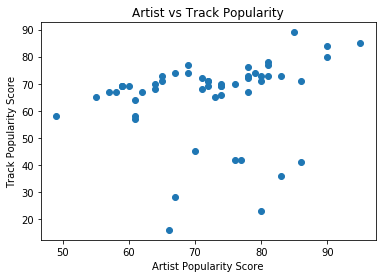

In [4]:
#track pop vs artist pop
plt.scatter(country['artist_pop'], country['track_pop']);
plt.xlabel('Artist Popularity Score');
plt.ylabel('Track Popularity Score');
plt.title('Artist vs Track Popularity');

I would've expected more of a linear trend without the seemingly 'out of place' tracks. Most tracks are above a popularity score of 50 which would make sense bc this is pulled from one of spotify's popular playlists.

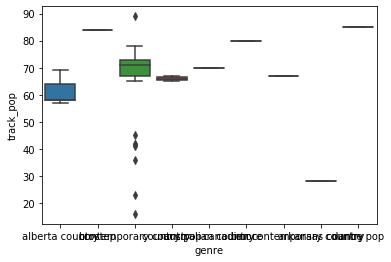

In [5]:
sns.boxplot('genre', 'track_pop', data = country)

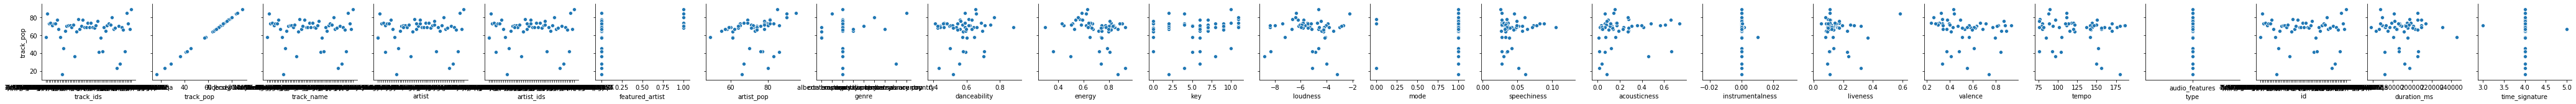

In [6]:
# This will show all of numerical variables plotted against the y popularity score
sns.pairplot(country, x_vars= country.columns, y_vars=['track_pop']);


Want to look at the following: 
- featured artist boxplot
- couple outliers of artist pop
- heatmap of correlations
- speechiness mean
- the two songs not in 4/4 time

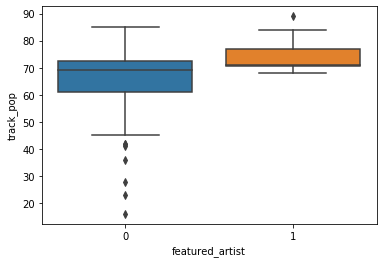

In [7]:
sns.boxplot('featured_artist', 'track_pop', data = country);

In [8]:
country['featured_artist'].value_counts(normalize=True)

0    0.796296
1    0.203704
Name: featured_artist, dtype: float64

Featured artist seems important. The majority of the songs with a featured artist have a popularity score above most of the other songs without a featured artist. There's one outlier that I'm curious about. This preliminary analysis is true and interesting with the caveat that only about 20% of our songs have featured artists so it's slightly imbalanced.

In [9]:
country.groupby('featured_artist')['track_pop'].mean()

featured_artist
0    63.116279
1    74.636364
Name: track_pop, dtype: float64

In [10]:
#finding that outlier of really high track pop score with a featured artist
(country[country['featured_artist']==1])['track_pop'].max()

89

In [11]:
#The most popular song in this playlist
country[country['track_pop']==89]

,track_ids,track_pop,track_name,artist,artist_ids,featured_artist,artist_pop,genre,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
53,2wrJq5XKLnmhRXHIAf9xBa,89,"10,000 Hours (with Justin Bieber)",Dan + Shay,7z5WFjZAIYejWy0NI5lv4T,1,85,contemporary country,0.654,0.63,...,0.0259,0.153,0.0,0.111,0.43,89.991,audio_features,2wrJq5XKLnmhRXHIAf9xBa,167693,4


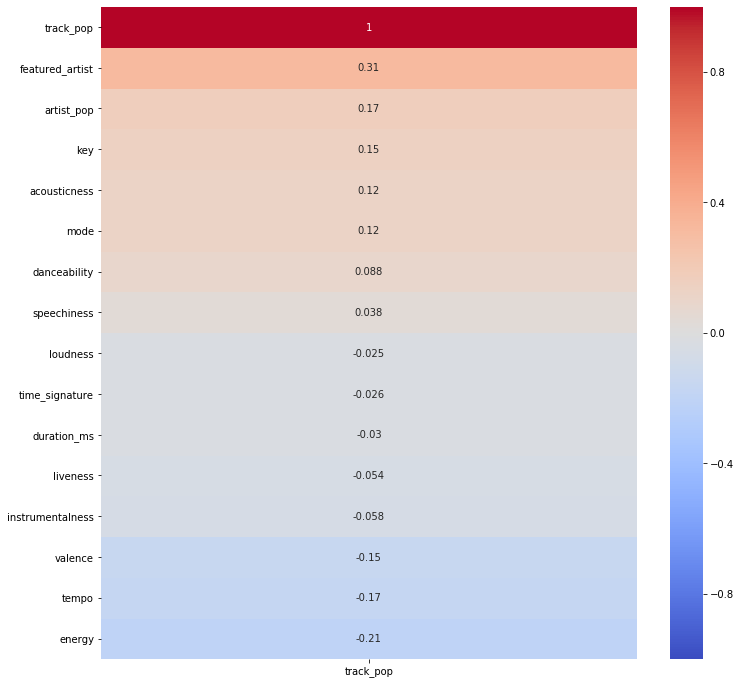

In [12]:
# Heatmap for all numerical variables against the track popularity
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(country.corr()[['track_pop']].sort_values('track_pop'),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

In [13]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 23 columns):
track_ids           54 non-null object
track_pop           54 non-null int64
track_name          54 non-null object
artist              54 non-null object
artist_ids          54 non-null object
featured_artist     54 non-null int64
artist_pop          54 non-null int64
genre               52 non-null object
danceability        54 non-null float64
energy              54 non-null float64
key                 54 non-null int64
loudness            54 non-null float64
mode                54 non-null int64
speechiness         54 non-null float64
acousticness        54 non-null float64
instrumentalness    54 non-null float64
liveness            54 non-null float64
valence             54 non-null float64
tempo               54 non-null float64
type                54 non-null object
id                  54 non-null object
duration_ms         54 non-null int64
time_signature      54 non-null int6

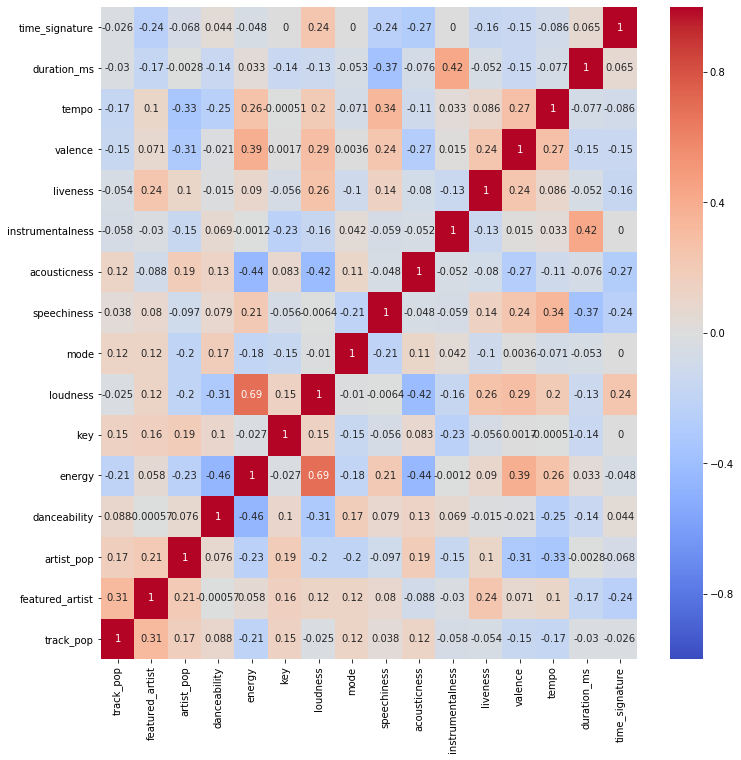

In [14]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(country.corr(),
 vmax=1, vmin=-1, cmap='coolwarm', annot=True, ax=ax);
ax.invert_yaxis()

Speechiness mean

In [15]:
country['speechiness'].mean()

0.04329999999999999

two songs not in 4/4 time-- interested to see if these are the same two songs as in the todays top hits playlist

In [16]:
country[country['time_signature']!=4]

,track_ids,track_pop,track_name,artist,artist_ids,featured_artist,artist_pop,genre,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
8,5ZcGhTRoqRvN5RoWW1MRg3,67,Man Enough Now - Radio Edit,Chris Bandi,10I1X1Vygp2J6R4jP5gF10,0,58,contemporary country,0.560,0.673,...,0.0343,0.0381,0.0,0.133,0.531,156.045,audio_features,5ZcGhTRoqRvN5RoWW1MRg3,184507,5
38,5FmvaZGd6fulojSToozLRD,71,"One Beer (HARDY feat. Lauren Alaina, Devin Daw...",HIXTAPE,4SbuhLih8eWLmqFzzmM3AK,1,65,contemporary country,0.516,0.745,...,0.0774,0.5630,0.0,0.275,0.825,186.004,audio_features,5FmvaZGd6fulojSToozLRD,173173,3


## Today's Top Hits Playlist - 50 songs

In [33]:
top_hits = pd.read_csv('../Data/todays_top_hits.csv')
top_hits.drop(columns = ['Unnamed: 0'], inplace = True)
top_hits.head()

,track_ids,track_pop,track_name,artist,artist_ids,featured_artist,artist_pop,genre,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
0,6WrI0LAC5M1Rw2MnX2ZvEg,97,Don't Start Now,Dua Lipa,6M2wZ9GZgrQXHCFfjv46we,0,94,dance pop,0.794,0.793,...,0.0842,0.01250,0.000000,0.0952,0.677,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,183290,4
1,0sf12qNH5qcw8qpgymFOqD,98,Blinding Lights,The Weeknd,1Xyo4u8uXC1ZmMpatF05PJ,0,96,canadian contemporary r&b,0.513,0.796,...,0.0629,0.00147,0.000209,0.0938,0.345,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,201573,4
2,364dI1bYnvamSnBJ8JcNzN,86,Intentions,Justin Bieber,1uNFoZAHBGtllmzznpCI3s,1,97,canadian pop,0.811,0.553,...,0.0552,0.31700,0.000000,0.1050,0.860,148.014,audio_features,364dI1bYnvamSnBJ8JcNzN,212869,4
3,4TnjEaWOeW0eKTKIEvJyCa,97,Falling,Trevor Daniel,7uaIm6Pw7xplS8Dy06V6pT,0,88,alternative r&b,0.784,0.430,...,0.0364,0.12300,0.000000,0.0887,0.236,127.087,audio_features,4TnjEaWOeW0eKTKIEvJyCa,159382,4
4,0nbXyq5TXYPCO7pr3N8S4I,100,The Box,Roddy Ricch,757aE44tKEUQEqRuT6GnEB,0,96,melodic rap,0.896,0.586,...,0.0559,0.10400,0.000000,0.7900,0.642,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,196653,4


In [34]:
top_hits

,track_ids,track_pop,track_name,artist,artist_ids,featured_artist,artist_pop,genre,danceability,energy,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,duration_ms,time_signature
0,6WrI0LAC5M1Rw2MnX2ZvEg,97,Don't Start Now,Dua Lipa,6M2wZ9GZgrQXHCFfjv46we,0,94,dance pop,0.794,0.793,...,0.0842,0.01250,0.000000,0.0952,0.6770,123.941,audio_features,6WrI0LAC5M1Rw2MnX2ZvEg,183290,4
1,0sf12qNH5qcw8qpgymFOqD,98,Blinding Lights,The Weeknd,1Xyo4u8uXC1ZmMpatF05PJ,0,96,canadian contemporary r&b,0.513,0.796,...,0.0629,0.00147,0.000209,0.0938,0.3450,171.017,audio_features,0sf12qNH5qcw8qpgymFOqD,201573,4
2,364dI1bYnvamSnBJ8JcNzN,86,Intentions,Justin Bieber,1uNFoZAHBGtllmzznpCI3s,1,97,canadian pop,0.811,0.553,...,0.0552,0.31700,0.000000,0.1050,0.8600,148.014,audio_features,364dI1bYnvamSnBJ8JcNzN,212869,4
3,4TnjEaWOeW0eKTKIEvJyCa,97,Falling,Trevor Daniel,7uaIm6Pw7xplS8Dy06V6pT,0,88,alternative r&b,0.784,0.430,...,0.0364,0.12300,0.000000,0.0887,0.2360,127.087,audio_features,4TnjEaWOeW0eKTKIEvJyCa,159382,4
4,0nbXyq5TXYPCO7pr3N8S4I,100,The Box,Roddy Ricch,757aE44tKEUQEqRuT6GnEB,0,96,melodic rap,0.896,0.586,...,0.0559,0.10400,0.000000,0.7900,0.6420,116.971,audio_features,0nbXyq5TXYPCO7pr3N8S4I,196653,4
5,5yY9lUy8nbvjM1Uyo1Uqoc,96,Life Is Good (feat. Drake),Future,1RyvyyTE3xzB2ZywiAwp0i,1,94,atl hip hop,0.676,0.609,...,0.4810,0.07060,0.000000,0.1520,0.5080,142.037,audio_features,5yY9lUy8nbvjM1Uyo1Uqoc,237735,4
6,2usxQITOSDqvkYiI0oIwao,85,You should be sad,Halsey,26VFTg2z8YR0cCuwLzESi2,0,95,dance pop,0.591,0.585,...,0.0277,0.14300,0.000000,0.1090,0.3240,110.940,audio_features,2usxQITOSDqvkYiI0oIwao,205473,4
7,3yOlyBJuViE2YSGn3nVE1K,93,My Oh My (feat. DaBaby),Camila Cabello,4nDoRrQiYLoBzwC5BhVJzF,1,95,dance pop,0.724,0.491,...,0.0296,0.01800,0.000013,0.0887,0.3830,105.046,audio_features,3yOlyBJuViE2YSGn3nVE1K,170746,4
8,3ZCTVFBt2Brf31RLEnCkWJ,96,everything i wanted,Billie Eilish,6qqNVTkY8uBg9cP3Jd7DAH,0,99,electropop,0.704,0.225,...,0.0994,0.90200,0.657000,0.1060,0.2430,120.006,audio_features,3ZCTVFBt2Brf31RLEnCkWJ,245426,4
9,3Dv1eDb0MEgF93GpLXlucZ,91,Say So,Doja Cat,5cj0lLjcoR7YOSnhnX0Po5,0,88,la indie,0.787,0.673,...,0.1580,0.25600,0.000004,0.0904,0.7860,110.962,audio_features,3Dv1eDb0MEgF93GpLXlucZ,237893,4


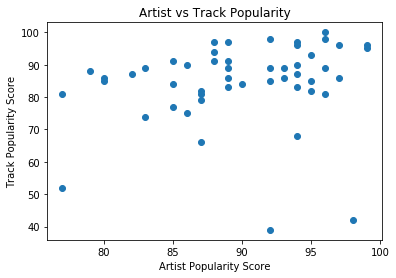

In [35]:
#track pop vs artist pop
plt.scatter(top_hits['artist_pop'], top_hits['track_pop']);
plt.xlabel('Artist Popularity Score');
plt.ylabel('Track Popularity Score');
plt.title('Artist vs Track Popularity');

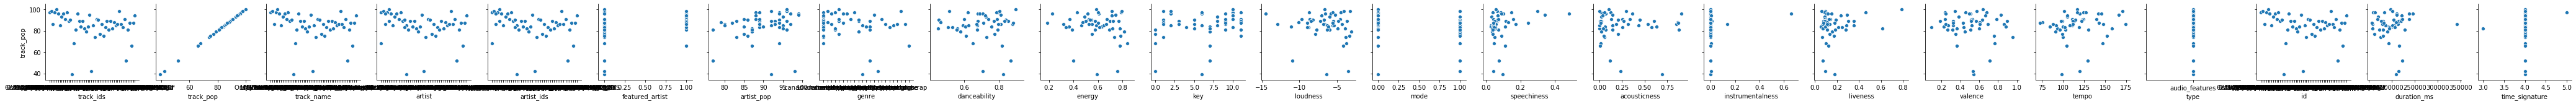

In [36]:
sns.pairplot(top_hits, x_vars= top_hits.columns, y_vars=['track_pop']);


The time signature outliers look the same as they did in our country playlist. I wonder if these are the two same songs.

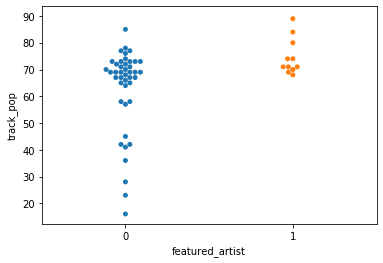

In [4]:
sns.swarmplot('featured_artist', 'track_pop', data = country);